In [7]:
import pandas as pd
import numpy as np                     
import seaborn as sns                  
import matplotlib.pyplot as plt 
import seaborn as sn                   
%matplotlib inline
import warnings                        
warnings.filterwarnings("ignore")

In [74]:

# loading the data
# test = pd.read_csv(r"C:\Users\kulde\OneDrive\Desktop\test.csv")


In [76]:
# train = pd.read_csv(r"C:\Users\kulde\OneDrive\Desktop\train.csv")
# test.head()

In [80]:
train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [79]:
test.columns


Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [78]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Load the training and test datasets
train_data = pd.read_csv(r"C:\Users\kulde\OneDrive\Desktop\train.csv")
test_data = pd.read_csv(r"C:\Users\kulde\OneDrive\Desktop\test.csv")

# Combine the datasets for joint preprocessing
combined_data = pd.concat([train_data, test_data], axis=0)

# Perform feature engineering on the combined data
# 1. Convert categorical variables to numerical using Label Encoding
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
label_encoder = LabelEncoder()
for col in categorical_cols:
    combined_data[col] = label_encoder.fit_transform(combined_data[col])

# 2. Scale numerical variables using StandardScaler
numerical_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
scaler = StandardScaler()
combined_data[numerical_cols] = scaler.fit_transform(combined_data[numerical_cols])

# Split the combined data back into train and test datasets
train = combined_data[:len(train_data)]
test = combined_data[len(train_data):]

# Perform any additional steps specific to your modeling requirements
# e.g., feature selection, model training, etc.

# Now you can use the preprocessed train_data and test_data for further analysis


In [132]:
import pandas as pd

# Assuming you have a DataFrame called 'data' containing the dataset
filtered_data = data[['default', 'marital', 'job', 'campaign']]
filtered_data = filtered_data[(filtered_data['default'] == 'yes') & 
                              (filtered_data['marital'] == 'single') & 
                              (filtered_data['job'] == 'unemployed')]

print(filtered_data)
most_used_campaign = filtered_data['campaign'].value_counts().idxmax()

# Print the result
print("Campaign mode/ID most used among defaulted, single, and unemployed individuals:", most_used_campaign)


      default marital         job  campaign
6851      yes  single  unemployed         1
12100     yes  single  unemployed         2
13244     yes  single  unemployed         1
13366     yes  single  unemployed         4
Campaign mode/ID most used among defaulted, single, and unemployed individuals: 1


In [83]:
train.shape, test.shape

((31647, 18), (13564, 18))

In [84]:
((31647, 18), (13564, 17))

((31647, 18), (13564, 17))

In [85]:
# train.head()
test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,38441,-0.841558,7,1,1,0,-0.408664,1,0,0,-0.096898,8,-0.924816,1.044601,-0.411453,-0.25194,3,NaN
1,40403,3.490445,5,0,0,0,0.467932,0,0,1,-1.779108,5,0.442042,-0.569351,-0.411453,-0.25194,3,NaN
2,3709,-0.935732,6,2,2,0,-0.400125,1,0,2,0.023260,8,1.622510,-0.569351,-0.411453,-0.25194,3,NaN
3,37422,1.512791,7,2,0,0,0.793084,1,0,1,-0.337213,8,-0.750075,-0.246560,-0.411453,-0.25194,3,NaN
4,12527,0.382703,1,0,1,0,-0.678967,0,1,2,-1.538792,5,-0.571452,-0.569351,-0.411453,-0.25194,3,NaN


# Univariate Analysis

In [86]:
train['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

In [87]:
train['subscribed'].value_counts(normalize=True)

no     0.882611
yes    0.117389
Name: subscribed, dtype: float64

<Axes: >

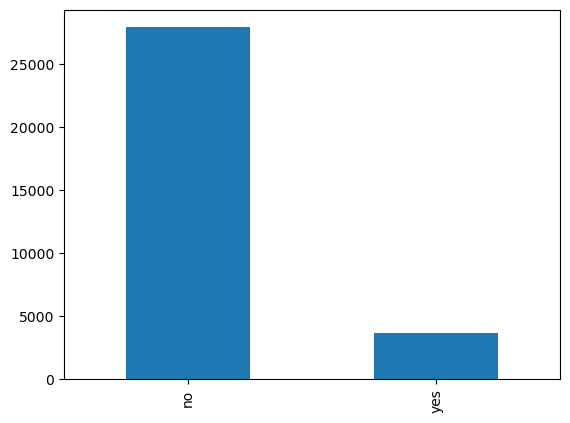

In [88]:
train['subscribed'].value_counts().plot.bar()

<Axes: xlabel='age', ylabel='Density'>

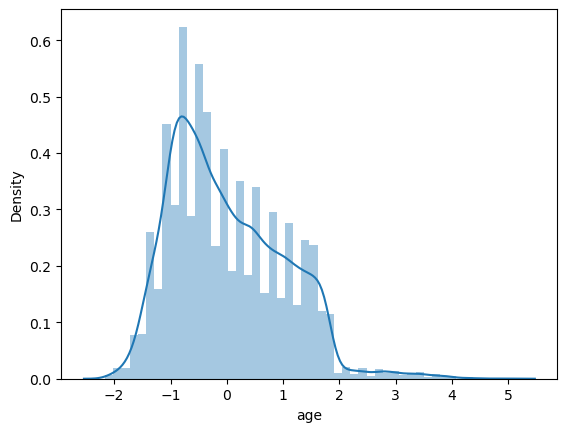

In [89]:
sn.distplot(train["age"])

<Axes: >

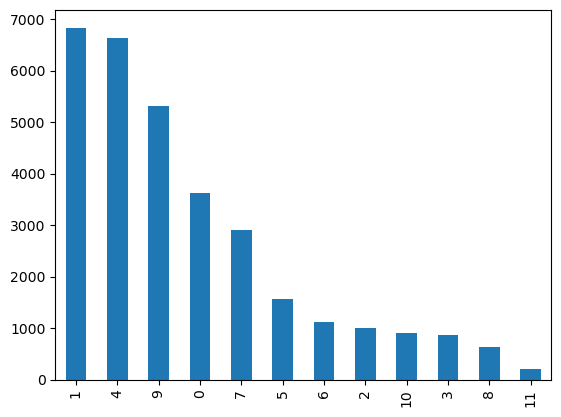

In [90]:
train['job'].value_counts().plot.bar()

<Axes: >

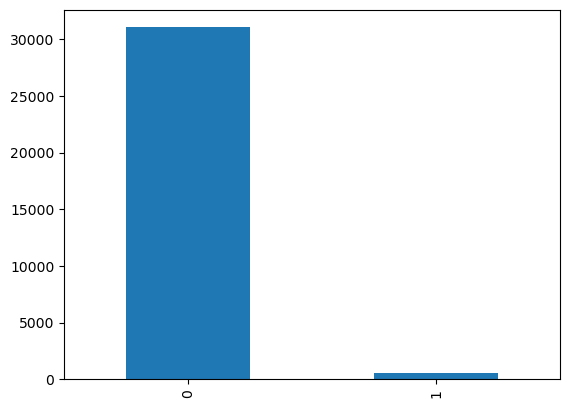

In [91]:
train['default'].value_counts().plot.bar()

subscribed    no  yes
job                  
0           3179  452
1           6353  489
2            923   85
3            795   79
4           5716  923
5           1212  362
6            983  140
7           2649  254
8            453  182
9           4713  594
10           776  129
11           180   26


Text(0, 0.5, 'Percentage')

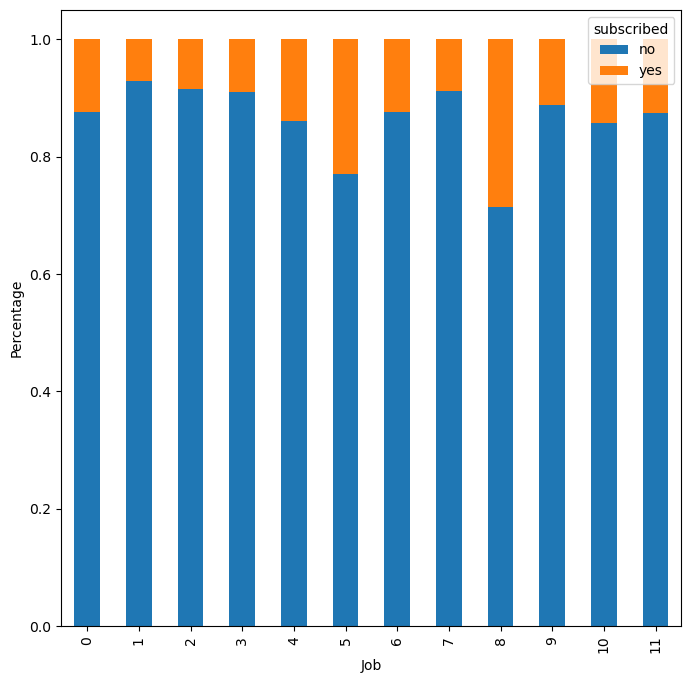

In [92]:
print(pd.crosstab(train['job'],train['subscribed']))

job=pd.crosstab(train['job'],train['subscribed'])
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('Job')
plt.ylabel('Percentage')

subscribed     no   yes
default                
0           27388  3674
1             544    41


Text(0, 0.5, 'Percentage')

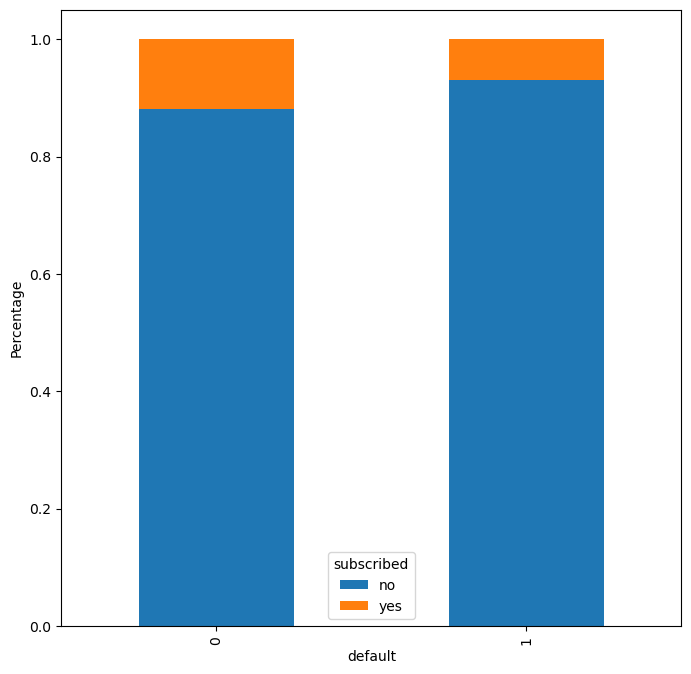

In [93]:
print(pd.crosstab(train['default'],train['subscribed']))

default=pd.crosstab(train['default'],train['subscribed'])
default.div(default.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('default')
plt.ylabel('Percentage')

In [94]:
train['subscribed'].replace('no', 0,inplace=True)
train['subscribed'].replace('yes', 1,inplace=True)

<Axes: >

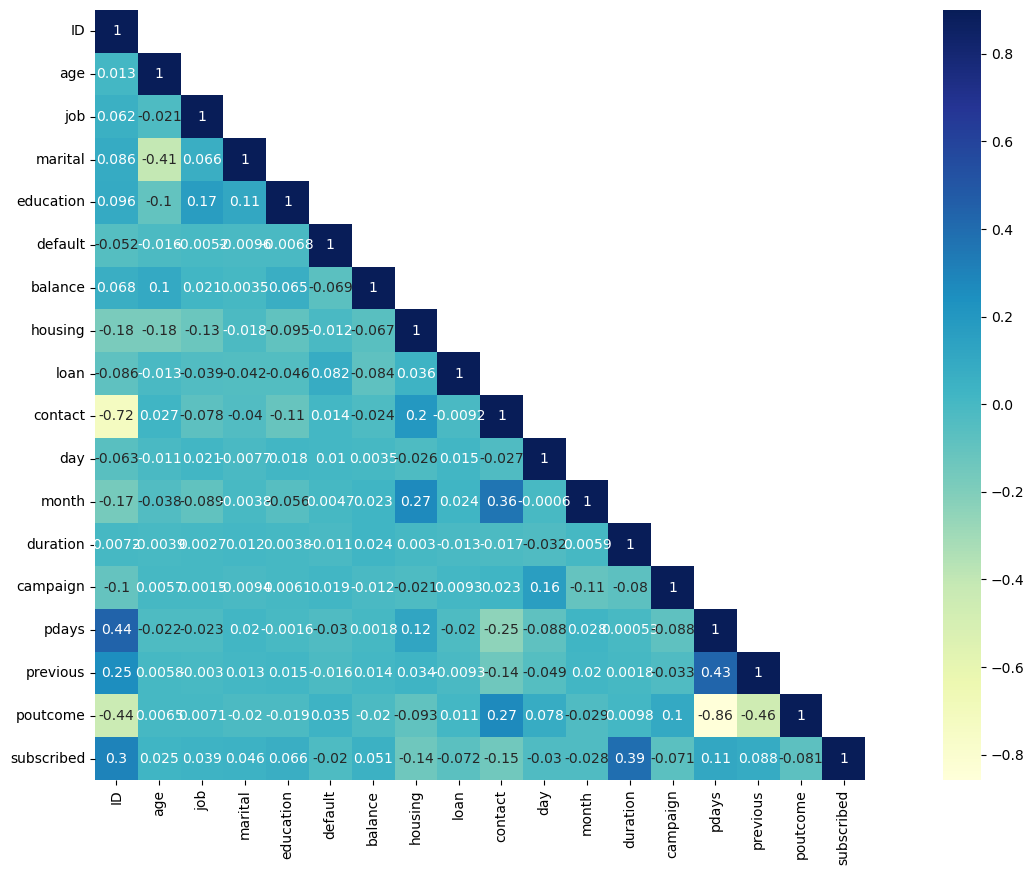

In [95]:
corr = train.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

In [96]:
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

# Model Building

In [97]:
target = train['subscribed']
train = train.drop('subscribed',1)

In [98]:
train = pd.get_dummies(train)

In [99]:
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,26110,1.418617,0,1,3,0,0.187448,0,0,1,0.383734,9,-0.831621,-0.246560,-0.411453,-0.251940,3
1,40576,-0.935732,11,1,1,0,-0.446434,0,0,0,0.503892,5,-0.649114,-0.246560,-0.411453,-0.251940,3
2,15320,-1.312428,7,1,1,0,-0.154783,1,0,0,0.263576,5,-0.070529,-0.569351,-0.411453,-0.251940,3
3,43962,1.512791,4,0,2,0,0.632150,0,0,0,0.744208,6,2.364186,-0.569351,0.437463,1.050473,2
4,29842,-0.935732,9,1,1,0,-0.408335,1,0,0,-1.418634,3,0.473107,-0.569351,-0.411453,-0.251940,3


In [100]:
from sklearn.model_selection import train_test_split

In [101]:
X_train, X_val, y_train, y_val = train_test_split(train, target, test_size = 0.2, random_state=12)


In [102]:
print(X_train)

          ID       age  job  marital  education  default   balance  housing  \
19036   3185 -0.088167    7        1          1        0 -0.256598        1   
1287    9216 -0.370689   11        1          0        0 -0.182043        0   
11880  39797 -0.370689    4        1          2        0 -0.003374        0   
17525    621  0.665225    9        1          1        0 -0.399139        0   
8295   10121  0.100181    3        1          0        1 -0.442164        0   
...      ...       ...  ...      ...        ...      ...       ...      ...   
7409   21681 -0.653211    4        2          2        0 -0.543323        1   
19709  30307 -1.218254    7        1          1        0 -0.295682        1   
25990  33016  0.947747    1        1          1        0 -0.010928        1   
5787   32523 -0.653211    1        1          1        0 -0.074973        1   
14155   6520 -1.406602    9        2          1        0 -0.422787        1   

       loan  contact       day  month  duration  ca

In [103]:
print(y_train)

19036    0
1287     0
11880    0
17525    0
8295     0
        ..
7409     0
19709    0
25990    0
5787     0
14155    0
Name: subscribed, Length: 25317, dtype: int64


# Logistic Regression

In [104]:
from sklearn.linear_model import LogisticRegression

In [105]:
lreg = LogisticRegression()

In [106]:
lreg.fit(X_train,y_train)

LogisticRegression()

In [107]:
prediction = lreg.predict(X_val)

In [108]:
from sklearn.metrics import accuracy_score

In [109]:
# calculating the accuracy score
accuracy_score(y_val, prediction)

0.8747235387045813

# Decision Tree

In [110]:
from sklearn.tree import DecisionTreeClassifier

try:
    from sklearn.tree import DecisionTreeClassifier
except:
    pass
from sklearn.cluster import KMeans

In [111]:
clf = DecisionTreeClassifier(max_depth=4, random_state=0)


In [112]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [113]:
# #from sklearn.model_selection import train_test_split

# #

# from sklearn.preprocessing import StandardScaler
# s =StandardScaler()
# X_train = s.fit_transform(X_train)
# y_train = s.fit_transform(y_train)

In [114]:
predict = clf.predict(X_val)

In [115]:
accuracy_score(y_val, predict)

0.9033175355450237

In [116]:
test = pd.get_dummies(test)

In [117]:
test_prediction = clf.predict(test)


In [118]:
submission = pd.DataFrame()

In [119]:
print(submission)

Empty DataFrame
Columns: []
Index: []


In [120]:
# creating a Business_Sourced column and saving the predictions in it
submission['ID'] = test['ID']
submission['subscribed'] = test_prediction

In [121]:
submission['subscribed'].replace(0,'no',inplace=True)
submission['subscribed'].replace(1,'yes',inplace=True)

In [124]:
submission.to_csv('submission.csv', header=True, index=False)